In [ ]:
# prompt: グーグルドライブと連結
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
# import optuna
# from optuna import Trial
from imblearn.combine import SMOTEENN
from collections import Counter

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , ExtraTreesClassifier , VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV , cross_val_score , StratifiedKFold , learning_curve
%matplotlib inline
# k-means法を使うためのインポート
from sklearn.cluster import KMeans

# 小数第3位まで表示
%precision 3

In [ ]:
dataFrame = pd.read_csv("/content/drive/MyDrive/A_comp/complete.csv")

In [ ]:
clusteriing_Data =dataFrame[['mou_Mean','totmrc_Mean','plcd_vce_Mean']]

(98266, 3)

In [ ]:
# KMeansクラスの初期化
kmeans = KMeans(n_clusters=3)

# クラスターの重心を計算
kmeans.fit(clusteriing_Data)

# クラスター番号を予測
y_pred = kmeans.predict(clusteriing_Data)

# クラスター番号をpandasのSeriesオブジェクトに変換
labels = pd.Series(y_pred, name='cluster_number')

# クラスター番号と件数を表示
print(labels.value_counts(sort=False))

cluster_number
0    64298
2    27520
1     6448
Name: count, dtype: int64


Text(0, 0.5, 'count')

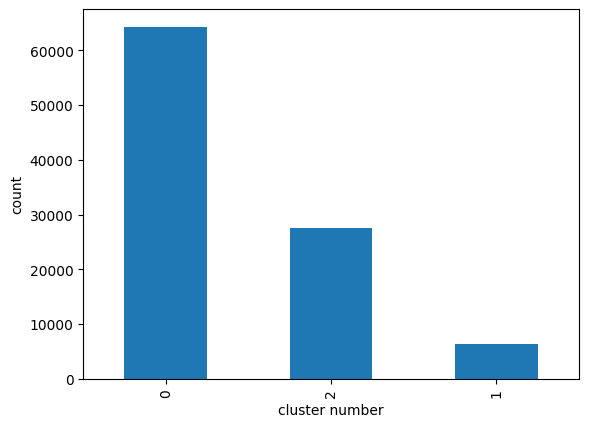

In [ ]:
# グラフを描画
ax = labels.value_counts(sort=False).plot(kind='bar')
ax.set_xlabel('cluster number')
ax.set_ylabel('count')

Text(0, 0.5, 'Distortion')

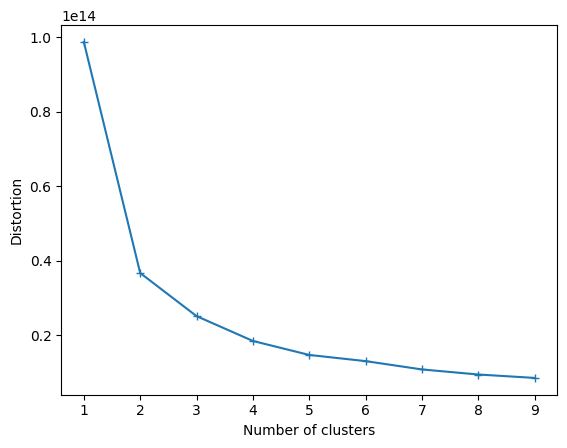

In [ ]:
# エルボー法による推定。クラスター数を1から10に増やして、それぞれの距離の総和を求める
dist_list =[]
for i in range(1,10):
    kmeans= KMeans(n_clusters=i)
    kmeans.fit(dataFrame)
    dist_list.append(kmeans.inertia_)

# グラフを表示
plt.plot(range(1,10), dist_list,marker='+')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

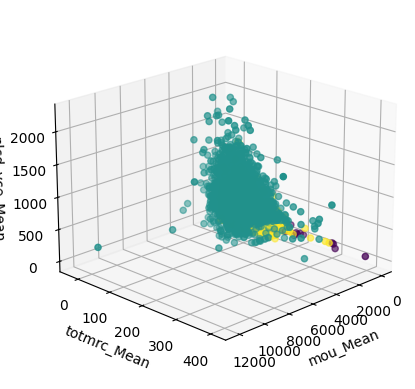

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ... (your existing code) ...

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with colors based on cluster labels
ax.scatter(clusteriing_Data['mou_Mean'], clusteriing_Data['totmrc_Mean'], clusteriing_Data['plcd_vce_Mean'], c=labels, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('mou_Mean')
ax.set_ylabel('totmrc_Mean')
ax.set_zlabel('plcd_vce_Mean')

# Adjust the viewing angle (elevation and azimuth)
ax.view_init(elev=20, azim=45)  # Example: elevation=20, azimuth=45

# Display the plot
plt.show()

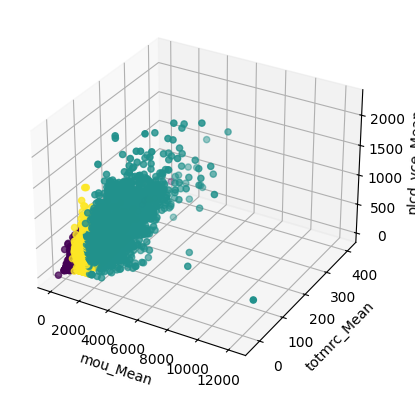

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ... (your existing code) ...

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points with colors based on cluster labels
ax.scatter(clusteriing_Data['mou_Mean'], clusteriing_Data['totmrc_Mean'], clusteriing_Data['plcd_vce_Mean'], c=labels, cmap='viridis')

# Set labels for the axes
ax.set_xlabel('mou_Mean')
ax.set_ylabel('totmrc_Mean')
ax.set_zlabel('plcd_vce_Mean')

# Display the plot
plt.show()

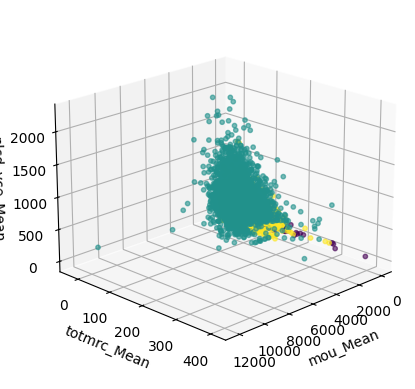

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ... (your existing code) ...

# Create a 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with reduced marker size and alpha for transparency
ax.scatter(clusteriing_Data['mou_Mean'], clusteriing_Data['totmrc_Mean'], clusteriing_Data['plcd_vce_Mean'], c=labels, cmap='viridis', s=10, alpha=0.6)

# Set labels for the axes
ax.set_xlabel('mou_Mean')
ax.set_ylabel('totmrc_Mean')
ax.set_zlabel('plcd_vce_Mean')

# Adjust the viewing angle (elevation and azimuth)
ax.view_init(elev=20, azim=45)  # Example: elevation=20, azimuth=45

# Set grid lines to white
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.grid(color='w')

# Display the plot
plt.show()

In [ ]:
dataFrame['clustering_number'] = y_pred

In [ ]:
dataFrame.to_csv('/content/drive/MyDrive/A_comp/clustering_num.csv',index=False)

In [ ]:
cluster_dataFrame = pd.read_csv("/content/drive/MyDrive/A_comp/clustering_num.csv")

In [ ]:
print(cluster_dataFrame.loc[cluster_dataFrame['clustering_number']==0, 'mou_Mean'].mean())
print(cluster_dataFrame.loc[cluster_dataFrame['clustering_number']==1, 'mou_Mean'].mean())
print(cluster_dataFrame.loc[cluster_dataFrame['clustering_number']==2, 'mou_Mean'].mean())
print("===========================================================================")
print(cluster_dataFrame.loc[cluster_dataFrame['clustering_number']==0, 'totmrc_Mean'].mean())
print(cluster_dataFrame.loc[cluster_dataFrame['clustering_number']==1, 'totmrc_Mean'].mean())
print(cluster_dataFrame.loc[cluster_dataFrame['clustering_number']==2, 'totmrc_Mean'].mean())
print("===========================================================================")
print(cluster_dataFrame.loc[cluster_dataFrame['clustering_number']==0, 'plcd_vce_Mean'].mean())
print(cluster_dataFrame.loc[cluster_dataFrame['clustering_number']==1, 'plcd_vce_Mean'].mean())
print(cluster_dataFrame.loc[cluster_dataFrame['clustering_number']==2, 'plcd_vce_Mean'].mean())

224.63671627941687
1941.4667274091191
851.9310743701781
38.49990766949731
80.90225858146557
56.21482506662027
71.20580733456093
504.229425143857
233.28414486434164


| cluster | mou_Mean   | totmrc_Mean   |   plcd_vce_Mean |
|---|---|---|---|
| 0 | 224.63671627941687 | 38.49990766949731 | 71.20580733456093 |
| 1 | 1941.4667274091191 | 80.90225858146557 | 504.229425143857 |
| 2 | 851.9310743701781 | 56.21482506662027| 233.28414486434164 |